<a href="https://colab.research.google.com/github/Syiful047/SENIN-SIANG_SYIFUL-ANAM_0110222144/blob/main/Praktikum03_Mandiri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Menghubungkan colab dengan google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#Memanggil data lewat gdrive
path = "/content/gdrive/MyDrive/MATKUL/SEMESTER_SEVEN/MACHINE_LEARNING/PRAKTIKUM/Praktikum03"

In [ ]:
import pandas as pd

# Read the CSV file with a comma delimiter
df = pd.read_csv(path + '/data/data_mandiri/day.csv', sep=',')

# cetak header data (5baris data) dari file
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
from sklearn.model_selection import train_test_split

# Membagi data menjadi data latih (80%) dan uji (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Tampilkan bentuk (jumlah baris) data hasil pembagian
print("Data latih X:", X_train.shape)
print("Data uji X  :", X_test.shape)
print("Data latih y:", y_train.shape)
print("Data uji y  :", y_test.shape)

Data latih X: (584, 11)
Data uji X  : (147, 11)
Data latih y: (584,)
Data uji y  : (147,)


In [ ]:
from sklearn.linear_model import LinearRegression

# Buat objek model regresi linear
model = LinearRegression()

# Latih model menggunakan data latih
model.fit(X_train, y_train)

# Cetak koefisien regresi dan intercept
print("Intercept:", model.intercept_)
print("Koefisien regresi untuk tiap variabel:")
for col, coef in zip(X.columns, model.coef_):
    print(f"{col:12} : {coef:.4f}")

Intercept: 1248.3209284778172
Koefisien regresi untuk tiap variabel:
season       : 524.7225
yr           : 2023.9975
mnth         : -38.4447
holiday      : -391.5508
weekday      : 72.9370
workingday   : 160.8049
weathersit   : -632.8563
temp         : 2097.2478
atemp        : 3488.0422
hum          : -865.4394
windspeed    : -2080.5404


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Gunakan model untuk memprediksi nilai cnt pada data uji
y_pred = model.predict(X_test)

# Hitung metrik evaluasi
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Cetak hasil evaluasi
print("Hasil Evaluasi Model Regresi Linear:")
print("-------------------------------------")
print(f"R² Score : {r2:.4f}")
print(f"MSE      : {mse:.2f}")
print(f"RMSE     : {rmse:.2f}")

Hasil Evaluasi Model Regresi Linear:
-------------------------------------
R² Score : 0.8277
MSE      : 691035.01
RMSE     : 831.29


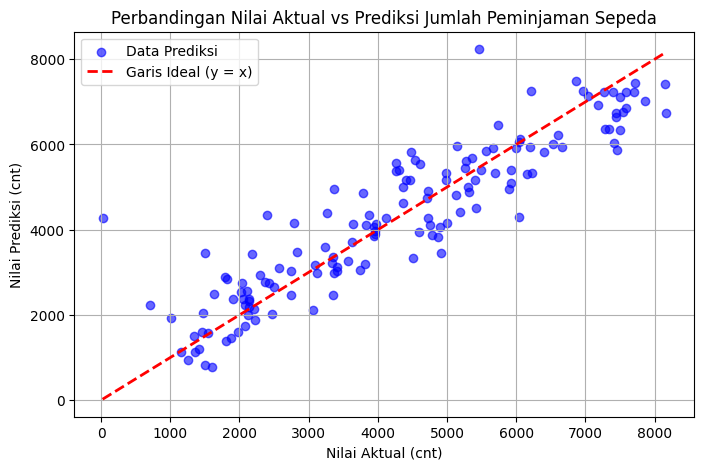

In [ ]:
import matplotlib.pyplot as plt

# Buat kanvas gambar
plt.figure(figsize=(8,5))

# Plot hubungan antara nilai aktual (y_test) dan nilai prediksi (y_pred)
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Data Prediksi')

# Tambahkan garis ideal (prediksi sempurna: y = x)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2, label='Garis Ideal (y = x)')

# Tambahkan label, judul, dan legend
plt.xlabel("Nilai Aktual (cnt)")
plt.ylabel("Nilai Prediksi (cnt)")
plt.title("Perbandingan Nilai Aktual vs Prediksi Jumlah Peminjaman Sepeda")
plt.legend()
plt.grid(True)

# Tampilkan grafik
plt.show()